In [1]:
import re
import json
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import io
import csv
from collections import defaultdict
import matplotlib.pyplot as plt


In [2]:
# Load the CSV file
filepath = '../past_data/prices_round_2_day_-1.csv'
df = pd.read_csv(filepath, delimiter=';')

# Filter the DataFrame to include only rows where humidity is between 60 and 80
filtered_df = df[(df['HUMIDITY'] >= 60) & (df['HUMIDITY'] <= 80)]

# Save the filtered DataFrame to a new CSV file
#filtered_df.to_csv('../past_data/humidity_filtered.csv', index=False)
filtered_df


,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,-1
...,...,...,...,...,...,...,...,...
7496,749600,1193.50,1.3,11.5,-2.6,3295.3782,79.959440,-1
7497,749700,1193.75,1.3,11.5,-2.6,3296.5337,79.969620,-1
7498,749800,1194.75,1.3,11.5,-2.6,3297.6892,79.979774,-1
7499,749900,1194.25,1.3,11.5,-2.4,3298.8447,79.989900,-1


Coefficient for Sunlight: 0.0254314454422941


Text(0, 0.5, 'Price')

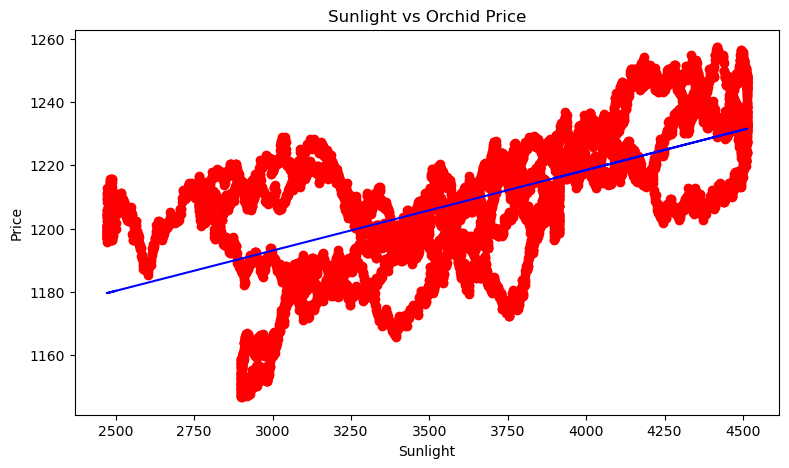

In [10]:
# Regression for Sunlight
X_sunlight = df[['SUNLIGHT']]
y = df['ORCHIDS']
model_sunlight = LinearRegression().fit(X_sunlight, y)
print("Coefficient for Sunlight:", model_sunlight.coef_[0])

# Plotting
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_sunlight, y, color='red')
plt.plot(X_sunlight, model_sunlight.predict(X_sunlight), color='blue')
plt.title('Sunlight vs Orchid Price')
plt.xlabel('Sunlight')
plt.ylabel('Price')


Coefficient for Humidity: 2.940089114642463


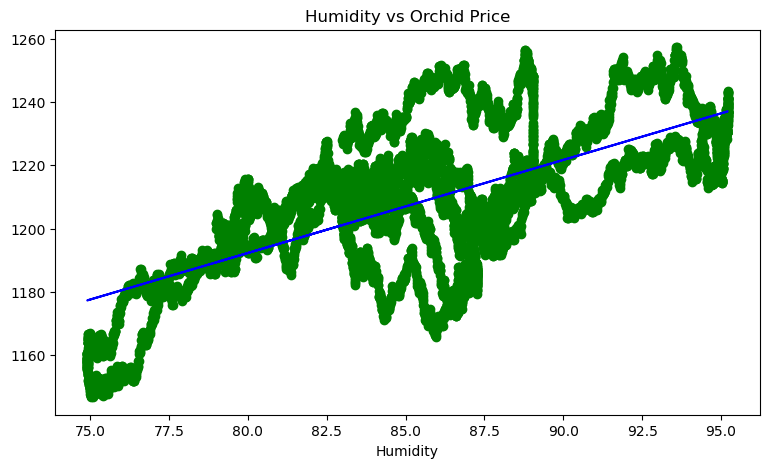

In [11]:

# Regression for Humidity
X_humidity = df[['HUMIDITY']]
model_humidity = LinearRegression().fit(X_humidity, y)
print("Coefficient for Humidity:", model_humidity.coef_[0])

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
plt.scatter(X_humidity, y, color='green')
plt.plot(X_humidity, model_humidity.predict(X_humidity), color='blue')
plt.title('Humidity vs Orchid Price')
plt.xlabel('Humidity')
plt.show()

In [13]:
files = ['../past_data/prices_round_2_day_-1.csv', '../past_data/prices_round_2_day_0.csv', '../past_data/prices_round_2_day_1.csv']
dataframes = [pd.read_csv(file, delimiter=';') for file in files]



Coefficient for Sunlight: 0.04009746242665499


Text(0, 0.5, 'Price')

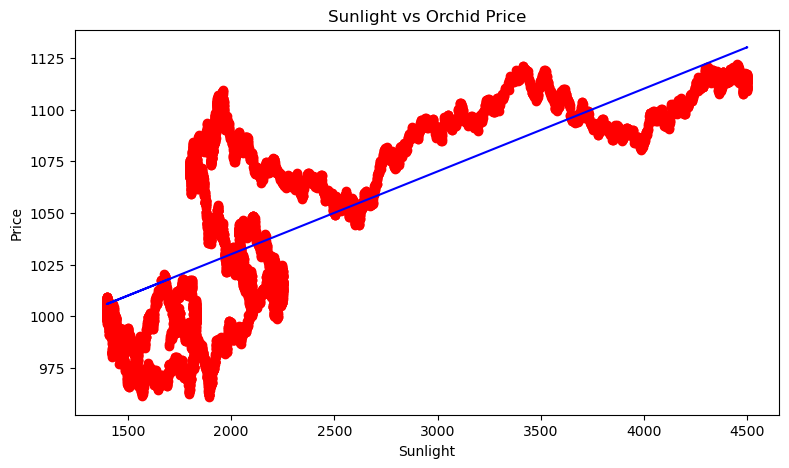

In [16]:
# Regression for Sunlight
X_sunlight = dataframes[1][['SUNLIGHT']]
y = dataframes[1]['ORCHIDS']
model_sunlight = LinearRegression().fit(X_sunlight, y)
print("Coefficient for Sunlight:", model_sunlight.coef_[0])

# Plotting
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_sunlight, y, color='red')
plt.plot(X_sunlight, model_sunlight.predict(X_sunlight), color='blue')
plt.title('Sunlight vs Orchid Price')
plt.xlabel('Sunlight')
plt.ylabel('Price')


Coefficient for Humidity: 3.372786748967989


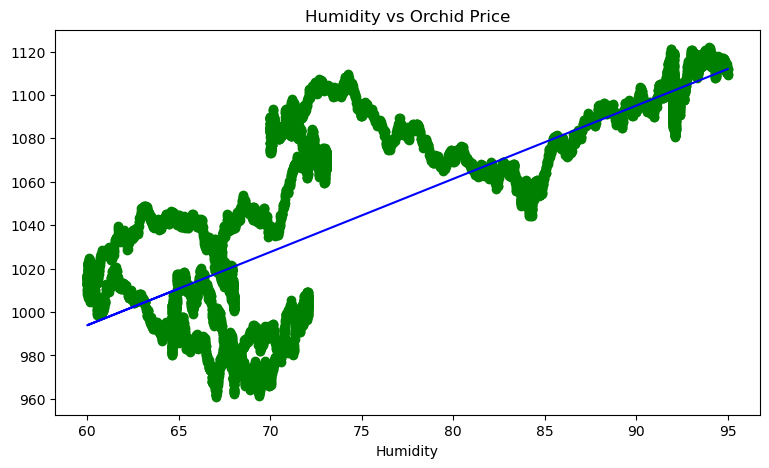

In [17]:

# Regression for Humidity
X_humidity = dataframes[1][['HUMIDITY']]
model_humidity = LinearRegression().fit(X_humidity, y)
print("Coefficient for Humidity:", model_humidity.coef_[0])

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
plt.scatter(X_humidity, y, color='green')
plt.plot(X_humidity, model_humidity.predict(X_humidity), color='blue')
plt.title('Humidity vs Orchid Price')
plt.xlabel('Humidity')
plt.show()